Standard Imports

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

%matplotlib inline


# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
building_permits = pd.read_csv('data/Building_Permits.csv',parse_dates=[10,11,12,13], infer_datetime_format=True)

In [3]:
res_bldg_prmts = building_permits[building_permits['PermitClassMapped']=='Residential'].copy()
demo = res_bldg_prmts[res_bldg_prmts['PermitTypeDesc']=='Demolition']

In [4]:
pending_demo = demo[(demo['StatusCurrent']!='Closed')&(demo['StatusCurrent']!='Completed')&(demo['OriginalAddress1'].notnull())][[ 'OriginalAddress1', 'OriginalCity', 'OriginalState', 'OriginalZip', 'Latitude', 'Longitude']].copy()
len(pending_demo['OriginalAddress1'].unique())

1048

In [5]:
pending_demo.shape

(1089, 6)

In [6]:
gis = pd.read_csv('data/Parcels_for_King_County_with_Address_with_Property_Information__parcel_address_area.csv', index_col='PIN')

/Users/ross/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,7,11,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
gis[['PIN', 'MAJOR', 'MINOR',  'SITETYPE', 'ADDR_FULL', 'FULLNAME', 'CTYNAME', 'LAT', 'LON',
 'KCTP_STATE', 'LOTSQFT', 'LEVYCODE', 'LEVY_JURIS', 'NEW_CONSTR', 'TAXVAL_RSN', 
 'APPRLNDVAL', 'APPR_IMPR', 'TAX_LNDVAL', 'TAX_IMPR', 'ACCNT_NUM', 'KCTP_TAXYR', 'QTS', 'SEC', 'TWP', 'RNG', 'PRIMARY_ADDR', 
 'LEGALDESC', 'Shape_Length', 'Shape_Area', 'ANNEXING_CITY', 'PAAUNIQUENAME', 'PROPTYPE', 'KCA_ZONING', 'KCA_ACRES', 'PREUSE_CODE', 'PREUSE_DESC']].head()

KeyError: "['PIN'] not in index"

In [8]:
['PIN', 'MAJOR', 'MINOR',  'SITETYPE', 'ADDR_FULL', 'FULLNAME', 'CTYNAME', 'LAT', 'LON',
 'KCTP_STATE', 'LOTSQFT', 'LEVYCODE', 'LEVY_JURIS', 'NEW_CONSTR', 'TAXVAL_RSN', 
 'APPRLNDVAL', 'APPR_IMPR', 'TAX_LNDVAL', 'TAX_IMPR', 'ACCNT_NUM', 'KCTP_TAXYR', 'QTS', 'SEC', 'TWP', 'RNG', 'PRIMARY_ADDR', 
 'LEGALDESC', 'Shape_Length', 'Shape_Area', 'ANNEXING_CITY', 'PAAUNIQUENAME', 'PROPTYPE', 'KCA_ZONING', 'KCA_ACRES', 'PREUSE_CODE', 'PREUSE_DESC']

['PIN',
 'MAJOR',
 'MINOR',
 'SITETYPE',
 'ADDR_FULL',
 'FULLNAME',
 'CTYNAME',
 'LAT',
 'LON',
 'KCTP_STATE',
 'LOTSQFT',
 'LEVYCODE',
 'LEVY_JURIS',
 'NEW_CONSTR',
 'TAXVAL_RSN',
 'APPRLNDVAL',
 'APPR_IMPR',
 'TAX_LNDVAL',
 'TAX_IMPR',
 'ACCNT_NUM',
 'KCTP_TAXYR',
 'QTS',
 'SEC',
 'TWP',
 'RNG',
 'PRIMARY_ADDR',
 'LEGALDESC',
 'Shape_Length',
 'Shape_Area',
 'ANNEXING_CITY',
 'PAAUNIQUENAME',
 'PROPTYPE',
 'KCA_ZONING',
 'KCA_ACRES',
 'PREUSE_CODE',
 'PREUSE_DESC']

In [9]:
gis.columns

Index(['OBJECTID', 'MAJOR', 'MINOR', 'COMMENTS', 'SITETYPE', 'ALIAS1', 'ALIAS2', 'SITEID', 'ADDR_HN', 'ADDR_PD', 'ADDR_PT', 'ADDR_SN', 'ADDR_ST', 'ADDR_SD', 'ADDR_NUM', 'ADDR_FULL', 'FULLNAME', 'ZIP5', 'PLUS4', 'CTYNAME', 'POSTALCTYNAME', 'LAT', 'LON', 'POINT_X', 'POINT_Y', 'COUNTY', 'KROLL', 'KCTP_CITY', 'KCTP_STATE', 'PLSS', 'PROP_NAME', 'PLAT_NAME', 'PLAT_LOT', 'PLAT_BLOCK', 'LOTSQFT', 'LEVYCODE', 'LEVY_JURIS', 'NEW_CONSTR', 'TAXVAL_RSN', 'APPRLNDVAL', 'APPR_IMPR', 'TAX_LNDVAL', 'TAX_IMPR', 'ACCNT_NUM', 'KCTP_TAXYR', 'UNIT_NUM', 'BLDG_NUM', 'CONDOSITUS', 'QTS', 'SEC', 'TWP', 'RNG', 'PRIMARY_ADDR', 'LEGALDESC', 'Shape_Length', 'Shape_Area', 'ANNEXING_CITY', 'PAAUNIQUENAME', 'PROPTYPE', 'KCA_ZONING', 'KCA_ACRES', 'PREUSE_CODE', 'PREUSE_DESC'], dtype='object')

In [10]:
gis.sort_values('TAX_IMPR', ascending=False).head(20)

,OBJECTID,MAJOR,MINOR,COMMENTS,SITETYPE,ALIAS1,ALIAS2,SITEID,ADDR_HN,ADDR_PD,ADDR_PT,ADDR_SN,ADDR_ST,ADDR_SD,ADDR_NUM,ADDR_FULL,FULLNAME,ZIP5,PLUS4,CTYNAME,POSTALCTYNAME,LAT,LON,POINT_X,POINT_Y,COUNTY,KROLL,KCTP_CITY,KCTP_STATE,PLSS,PROP_NAME,PLAT_NAME,PLAT_LOT,PLAT_BLOCK,LOTSQFT,LEVYCODE,LEVY_JURIS,NEW_CONSTR,TAXVAL_RSN,APPRLNDVAL,APPR_IMPR,TAX_LNDVAL,TAX_IMPR,ACCNT_NUM,KCTP_TAXYR,UNIT_NUM,BLDG_NUM,CONDOSITUS,QTS,SEC,TWP,RNG,PRIMARY_ADDR,LEGALDESC,Shape_Length,Shape_Area,ANNEXING_CITY,PAAUNIQUENAME,PROPTYPE,KCA_ZONING,KCA_ACRES,PREUSE_CODE,PREUSE_DESC
PIN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0942000640,63408,94200,0640,NaN,C1,NaN,NaN,1011945.0,411,NaN,NaN,COLUMBIA,ST,NaN,411.0,411 COLUMBIA ST,COLUMBIA ST,98104.0,1654,SEATTLE,SEATTLE,47.604580,-122.330712,1.271046e+06,224126.135863,KING,40,LOS ANGELES,CA,SW32-25-4,COLUMBIA CENTER ( former B. of A. Tower),BORENS C D ADD,1 THRU 8,28,59266.0,11.0,SEATTLE,N,,71119200.0,725455800.0,71119200.0,725455800.0,9.420006e+10,2019.0,NaN,NaN,NaN,SW,32.0,25.0,4.0,1,BORENS C D ADD ALL BLK 28 C.D. BOREN'S ADDITIO...,973.998832,59279.036737,NaN,NaN,C,DOC1 U/450/U,1.360560,106.0,Office Building ...
0660000220,44522,66000,0220,NaN,C1,NaN,NaN,1134465.0,2101,NaN,NaN,7TH,AVE,NaN,2101.0,2101 7TH AVE,7TH AVE,98121.0,5114,SEATTLE,SEATTLE,47.615793,-122.339237,1.269023e+06,228256.207655,KING,39,SEATTLE,WA,NE31-25-4,AMAZON - DAY 1 TOWER & SPHERES,BELL HEIRS OF SARAH A 2ND ADD,10-11-12,19,19440.0,11.0,SEATTLE,N,,21384000.0,647397000.0,21384000.0,647397000.0,6.600002e+10,2019.0,NaN,NaN,NaN,NE,31.0,25.0,4.0,1,BELL HEIRS OF S A 2ND ADD LESS POR FOR ST TGW ...,576.411667,19462.962104,NaN,NaN,C,DOC2 500/300-550,0.446281,106.0,Office Building ...
1976700125,159536,197670,0125,,C1,NaN,NaN,840436.0,601,NaN,NaN,UNION,ST,NaN,601.0,601 UNION ST,UNION ST,98101.0,2485,SEATTLE,SEATTLE,47.610460,-122.332159,1.270731e+06,226277.264434,KING,40,SEATTLE,WA,NW32-25-4,TWO UNION SQUARE,DENNYS A A 5TH ADD,&,61,89950.0,11.0,SEATTLE,N,,107940000.0,621549000.0,107940000.0,621549000.0,1.976700e+11,2019.0,NaN,NaN,NaN,NW,32.0,25.0,4.0,1,DENNYS AA 5TH ADD PARCEL B SEA SP #8606903 REC...,1528.267716,92270.061823,NaN,NaN,C,DOC1 U/450/U,2.064968,106.0,Office Building ...
0659000880,44492,65900,0880,AA update,C1,NaN,NaN,929079.0,2001,NaN,NaN,WESTLAKE,AVE,NaN,2001.0,2001 WESTLAKE AVE,WESTLAKE AVE,98121.0,2605,SEATTLE,SEATTLE,47.615004,-122.338046,1.269311e+06,227962.988753,KING,39,SEATTLE,WA,NE31-25-4,AMAZON DOPPLER TOWER & MEETING CENTER,BELL HEIRS OF SARAH A ADD,11-12,14,8746.0,11.0,SEATTLE,N,,9620600.0,601779400.0,9620600.0,601779400.0,6.590009e+10,2019.0,NaN,NaN,NaN,NE,31.0,25.0,4.0,1,BELL HEIRS OF S A ADD LOT 11 TGW POR LOT 12 W ...,412.725665,8737.138328,NaN,NaN,C,DOC2 500/300-550,0.200781,106.0,Office Building ...
1974700120,159451,197470,0120,,C1,NaN,NaN,833525.0,1201,NaN,NaN,3RD,AVE,NaN,1201.0,1201 3RD AVE,3RD AVE,98101.0,3064,SEATTLE,SEATTLE,47.607181,-122.335942,1.269774e+06,225099.675254,KING,39,SEATTLE,WA,SE31-25-4,1201 THIRD AVE (former Washington Mutual Tower),DENNYS A A 2ND ADD,1 THRU 8,5,56400.0,11.0,SEATTLE,N,,67680000.0,581116000.0,67680000.0,581116000.0,1.974700e+11,2019.0,NaN,NaN,NaN,SE,31.0,25.0,4.0,1,DENNY'S A A 2ND ADD LESS NELY 9 ...,950.224106,56427.754928,NaN,NaN,C,DOC1 U/450/U,1.294766,106.0,Office Building ...
1975700080,159460,197570,0080,NaN,C1,NaN,NaN,438355.0,1420,NaN,NaN,5TH,AVE,NaN,1420.0,1420 5TH AVE,5TH AVE,98101.0,3940,SEATTLE,SEATTLE,47.610547,-122.334663,1.270114e+06,226321.061591,KING,39,CHICAGO,IL,SE31-25-4,US Bank Centre,DENNYS A A 3RD ADD,1 THRU 6 &,17,57770.0,11.0,SEATTLE,N,,34662000.0,493722000.0,34662000.0,493722000.0,1.975700e+11,2019.0,NaN,NaN,NaN,SE,31.0,25.0,4.0,1,DENNYS AA 3RD ADD POR OF BLK 1...,1200.027679,57676.282619,NaN,NaN,C,DRC 85-170,1.326217,106.0,Office Building ...
0942000345,63389,94200,0345,,C1,NaN,NaN,834110.0,925,NaN,NaN,4TH,AVE,NaN,925.0,925 4TH AVE,4TH AVE,98104.0,1192,SEATTLE,SEATTLE,47.605692,-122.333056,1.270475e+06,224542.794806,KING,40,NEW YO

In [11]:
full_pending = pending_demo.merge(gis, left_on=['OriginalAddress1', 'OriginalCity'], right_on=['ADDR_FULL', 'CTYNAME'], how='inner')

In [12]:
len(full_pending['OriginalAddress1'].unique())

825

In [13]:
len(full_pending)

862

In [14]:
full_pending.head()

,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,Latitude,Longitude,OBJECTID,MAJOR,MINOR,COMMENTS,SITETYPE,ALIAS1,ALIAS2,SITEID,ADDR_HN,ADDR_PD,ADDR_PT,ADDR_SN,ADDR_ST,ADDR_SD,ADDR_NUM,ADDR_FULL,FULLNAME,ZIP5,PLUS4,CTYNAME,POSTALCTYNAME,LAT,LON,POINT_X,POINT_Y,COUNTY,KROLL,KCTP_CITY,KCTP_STATE,PLSS,PROP_NAME,PLAT_NAME,PLAT_LOT,PLAT_BLOCK,LOTSQFT,LEVYCODE,LEVY_JURIS,NEW_CONSTR,TAXVAL_RSN,APPRLNDVAL,APPR_IMPR,TAX_LNDVAL,TAX_IMPR,ACCNT_NUM,KCTP_TAXYR,UNIT_NUM,BLDG_NUM,CONDOSITUS,QTS,SEC,TWP,RNG,PRIMARY_ADDR,LEGALDESC,Shape_Length,Shape_Area,ANNEXING_CITY,PAAUNIQUENAME,PROPTYPE,KCA_ZONING,KCA_ACRES,PREUSE_CODE,PREUSE_DESC
0,2222 NW 64TH ST,SEATTLE,WA,98107.0,47.675513,-122.385734,224779,276760,0194,"Seattle short subdivision 3028021, updated 6/2...",R2,NaN,NaN,329403.0,2222,NW,NaN,64TH,ST,NaN,2222.0,2222 NW 64TH ST,NW 64TH ST,98107.0,2441,SEATTLE,SEATTLE,47.675457,-122.385786,1.257983e+06,250243.548523,KING,11,SEATTLE,WA,NE11-25-3,,GILMAN PARK ADD BLKS 01 THRU 47,17,2,832.0,10.0,SEATTLE,N,,174100.0,91000.0,174100.0,91000.0,2.767600e+11,2019.0,NaN,NaN,NaN,NE,11.0,25.0,3.0,1,GILMAN PARK ADD LOT Y SEATTLE SP #3030963-LU R...,159.627803,827.652639,NaN,NaN,R,LR1,0.019100,29.0,Townhouse Plat ...
1,2472 S COLLEGE ST,SEATTLE,WA,98144.0,47.583123,-122.300575,123664,159460,0085,NaN,R1,NaN,NaN,459569.0,2472,S,NaN,COLLEGE,ST,NaN,2472.0,2472 S COLLEGE ST,S COLLEGE ST,98144.0,4763,SEATTLE,SEATTLE,47.583119,-122.300559,1.278334e+06,216155.978246,KING,52,FEDERAL Y,WA,NE9-24-4,,CITY GARDENS,17,A,4000.0,10.0,SEATTLE,N,,368000.0,384000.0,368000.0,384000.0,1.594600e+11,2019.0,NaN,NaN,NaN,NE,9.0,24.0,4.0,1,CITY GARDENS,279.809432,3996.200319,NaN,NaN,R,C1-65,0.091827,2.0,Single Family(Res Use/Zone) ...
2,8611 23RD AVE NE,SEATTLE,WA,98115.0,47.691597,-122.304418,379292,510140,0755,NaN,R2,NaN,NaN,273927.0,8611,NaN,NaN,23RD,AVE,NE,8611.0,8611 23RD AVE NE,23RD AVE NE,98115.0,3310,SEATTLE,SEATTLE,47.691588,-122.304496,1.278119e+06,255733.107097,KING,234,SEATTLE,WA,SW33-26-4,,MAPLE LEAF TO GREEN LAKE CIRCLE POR OF,4 AC 5,10,4930.0,10.0,SEATTLE,N,,367000.0,1000.0,367000.0,1000.0,5.101401e+11,2019.0,NaN,NaN,NaN,SW,33.0,26.0,4.0,1,MAPLE LEAF TO GREEN LAKE CIRCLE LESS ST,300.536578,4926.569706,NaN,NaN,R,LR1,0.113177,301.0,Vacant(Multi-family) ...
3,2439 NW 61ST ST,SEATTLE,WA,98107.0,47.672911,-122.389346,225613,276760,2770,NaN,R1,NaN,NaN,318608.0,2439,NW,NaN,61ST,ST,NaN,2439.0,2439 NW 61ST ST,NW 61ST ST,98107.0,3213,SEATTLE,SEATTLE,47.672889,-122.389306,1.257097e+06,249324.549376,KING,11,SEATTLE,WA,NW11-25-3,,GILMAN PARK ADD BLKS 01 THRU 47,4,26,4650.0,10.0,SEATTLE,N,,716000.0,1000.0,716000.0,1000.0,2.767603e+11,2019.0,NaN,NaN,NaN,NW,11.0,25.0,3.0,1,GILMAN PARK ADD LESS ALLEY,285.872325,4646.406906,NaN,NaN,R,LR1,0.106749,6.0,Single Family(C/I Zone) ...
4,501 N 68TH ST,SEATTLE,WA,98103.0,47.678504,-122.352454,189339,233130,0100,NaN,R1,NaN,NaN,313509.0,501,N,NaN,68TH,ST,NaN,501.0,501 N 68TH ST,N 68TH ST,98103.0,5317,SEATTLE,SEATTLE,47.678509,-122.352417,1.266225e+06,251192.302203,KING,4,SEATTLE W,W,SW6-25-4,,EMERALD PARK ADD,19-20,1,5445.0,10.0,SEATTLE,N,FS,393000.0,220000.0,350000.0,196000.0,2.331300e+11,2019.0,NaN,NaN,NaN,SW,6.0,25.0,4.0,1,EMERALD PARK ADD W 15 FT OF 1...,331.287626,5421.274753,NaN,NaN,R,SF 5000,0.125000,2.0,Single Family(Res Use/Zone) ...


In [15]:
parcels = pd.read_csv('data/Parcel.zip', encoding="Latin1")
parcels = parcels[(parcels.PropType=='R')]
parcels['PIN'] = parcels['Major'].map(str).apply(lambda x: x.zfill(6)) + parcels['Minor'].map(str).apply(lambda x: x.zfill(4))

In [16]:
parcels = parcels.set_index('PIN')

In [17]:
parcelgroups = parcels.groupby('Major').mean()

In [18]:
len(parcels)/len(parcels.groupby('Major').count())

43.97065498082792

In [20]:
updates = pd.read_csv('data/Change History Detail.zip', encoding='latin_1')

In [21]:
updates.head()

,Major,Minor,EventId,Id,Attribute,AttributeValue,UpdateDate,UpdatedBy
0,525330,400,4239471,Land,BaseLandVal,65000,May 24 1999 10:42AM,MHAR
1,812630,180,14439049,RealPropAcct,UpdatedBy,7573A164-E1F9-4D76-95A4-8B913697A6C4,Apr 5 2018 9:55PM,MTRI
2,179638,290,14472049,RealPropAcct,UpdatedBy,7573A164-E1F9-4D76-95A4-8B913697A6C4,Apr 12 2018 9:51PM,MTRI
3,378240,130,13805884,RealPropAcct,UpdateDate,Aug 14 2017 8:31AM,Aug 17 2017 6:06PM,MTRI
4,294600,3225,13055943,RealPropAcct,UpdateDate,Nov 14 2016 8:31AM,Dec 8 2016 8:22PM,MTRI


In [22]:
oldblock = updates[updates['Major']==685270]

In [23]:
obp = np.sort(oldblock['Minor'].unique())

In [24]:
obp

array([  5,  10,  15,  20,  30,  35,  36,  40,  45,  50,  55,  65,  66,
        70,  75,  76,  80,  85,  86,  90,  91,  95,  96,  97,  98,  99,
       100, 105, 110, 111, 115, 116, 117, 120, 125, 126, 130, 131, 135,
       150, 155, 156, 157, 158, 159, 160, 161, 165, 170, 171, 175, 176,
       185, 190, 195, 196, 200, 201, 202, 203, 205, 206, 210, 211, 215,
       220, 225, 226, 227, 228, 230, 231, 236, 240, 245, 246, 250, 255,
       256, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271,
       272, 273, 274, 279, 280, 281, 282, 283, 284, 285, 286, 287, 294,
       295, 296, 297, 298, 299, 305, 310, 311, 315, 320, 325, 330, 335,
       336, 340, 345, 355, 405, 410, 411, 412, 413, 414, 415, 416, 420,
       421, 425, 428, 429, 430, 431, 432, 433, 434, 435, 440, 445, 446,
       447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459,
       460, 461, 465, 466, 468, 470, 475, 476, 477, 478, 485, 486, 490,
       491, 496, 515, 516, 520, 525, 526, 527, 528, 529, 530, 53

In [25]:
unitb = pd.read_csv('data/Unit Breakdown.zip')

In [26]:
unitb.head()

,Major,Minor,UnitTypeItemId,NbrThisType,SqFt,NbrBedrooms,NbrBaths
0,82605,9206,1,29,813,0,1.0
1,722850,2420,1,1,0,5,2.0
2,292605,9021,1,51,1165,3,2.0
3,182604,9228,1,10,0,1,1.0
4,720000,201,1,12,750,1,1.0


In [27]:
unitb[unitb['Major']==685270]['Minor'].unique()

array([165, 455,  55,  20, 260, 285, 296, 150, 345, 405, 256, 206, 595,
       425, 255, 295, 530, 440,  15, 575, 478, 240, 546, 185, 340, 196,
       175, 171,  65, 160, 496, 170, 531, 421, 176,  30])

In [28]:
rps = pd.read_csv('data/Real Property Sales.zip',parse_dates=[3], infer_datetime_format=True)

/Users/ross/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
rps[rps['Major']==685270].sort_values('DocumentDate')

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
191673,681795,685270,210,1980-08-18,0,198207120470,009,052,685270,P,02 PT,21,HALL LOUIS REESE ...,HALL ROBERTA ANN ...,3,6,15,N,N,N,,9,8,11
730463,663838,685270,236,1982-01-04,88000,198201040060,009,052,685270,P,01-02 PT,22,GRUNDSTEIN LEON ...,HAMRICK ROY A ...,0,0,11,,,,,1,8,19
1817500,677387,685270,165,1982-05-27,240000,198205280464,009,052,685270,P,11,19,DEMILE CONNIE WHITE ...,BOYD DANIEL N+LAURA J ...,3,4,2,N,N,N,,1,2,
1521410,677807,685270,160,1982-06-01,145000,198206020413,009,052,685270,P,10,19,SLG ENTERPRISES ...,VARNES BJARNE+ROSALIE ...,3,0,11,N,N,N,,1,2,19
1735911,746529,685270,120,1983-10-10,69500,198310210600,009,052,685270,P,02 PT,19,GEARHART PHILLIP A+KAREN S ...,FARKAS MARLO ...,3,0,2,N,N,N,,1,8,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626293,3011944,685270,576,2019-09-02,0,20190925000800,,,,,,,SWANSONIA SEDU-34 LLC ...,SWANSONIA LLC ...,1,7,15,N,N,N,N,18,1,11 18 31
1557198,3010327,685270,468,2019-09-04,0,20190916000575,,,,,,,GRAYSON LISA L+DAVIS THOMAS V ...,GRAYSON LISA L ...,11,6,3,N,N,N,N,1,8,
1275347,3011637,685270,566,2019-09-19,0,20190924000217,,,,,,,LUBETICH JOHN F JR ...,LUBETICH JOHN F JR ...,11,6,15,N,N,N,N,1,8,
1968656,3011945,685270,575,2019-09-25,10770200,20190925000801,,,,,,,SWANSONIA LLC ...,BASE SWANSONIA LLC ...,3,7,3,N,N,N,N,18,2,45


In [30]:
rps['DocumentDate'][0]

Timestamp('2014-08-21 00:00:00')

In [31]:
demo_dates = demo['AppliedDate'].sort_values().dropna()
demo_dates

122157   2005-08-30
122803   2007-02-02
56228    2007-04-23
63602    2007-07-24
109322   2007-08-17
            ...    
4189     2019-10-03
2350     2019-10-03
4115     2019-10-10
4391     2019-10-10
4380     2019-10-10
Name: AppliedDate, Length: 4730, dtype: datetime64[ns]

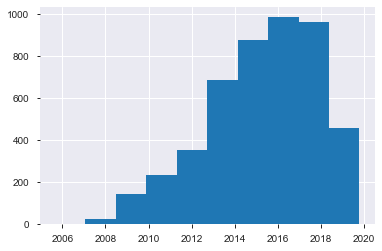

In [32]:
fig, ax = plt.subplots()
    
fig = plt.hist(demo_dates)

In [33]:
taxtable = pd.read_csv('data/Tax Data.zip', index_col='AcctNbr')

/Users/ross/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [34]:
taxtable.head()

,ReceivableType,BillYr,OmitYr,LevyCode,ApprLandVal,ApprImpsVal,NewDollar,LandVal,ImpsVal,TaxValReason,TaxStat,AcctStat
AcctNbr,,,,,,,,,,,,
216200018002,R,1993,0,1031,0,0,0,58800,337000,,T,A
216200018002,R,1994,0,1031,0,0,0,58800,337000,,T,A
216200018002,R,1995,0,1031,0,0,0,90000,340500,,T,A
216200018002,R,1996,0,1031,0,0,0,90000,340500,,T,A
216200018002,R,1997,0,1031,0,0,0,90000,340500,,T,A


In [36]:
taxtable.head()

,ReceivableType,BillYr,OmitYr,LevyCode,ApprLandVal,ApprImpsVal,NewDollar,LandVal,ImpsVal,TaxValReason,TaxStat,AcctStat
AcctNbr,,,,,,,,,,,,
216200018002,R,1993,0,1031,0,0,0,58800,337000,,T,A
216200018002,R,1994,0,1031,0,0,0,58800,337000,,T,A
216200018002,R,1995,0,1031,0,0,0,90000,340500,,T,A
216200018002,R,1996,0,1031,0,0,0,90000,340500,,T,A
216200018002,R,1997,0,1031,0,0,0,90000,340500,,T,A


In [37]:
gis.head()

,OBJECTID,MAJOR,MINOR,COMMENTS,SITETYPE,ALIAS1,ALIAS2,SITEID,ADDR_HN,ADDR_PD,ADDR_PT,ADDR_SN,ADDR_ST,ADDR_SD,ADDR_NUM,ADDR_FULL,FULLNAME,ZIP5,PLUS4,CTYNAME,POSTALCTYNAME,LAT,LON,POINT_X,POINT_Y,COUNTY,KROLL,KCTP_CITY,KCTP_STATE,PLSS,PROP_NAME,PLAT_NAME,PLAT_LOT,PLAT_BLOCK,LOTSQFT,LEVYCODE,LEVY_JURIS,NEW_CONSTR,TAXVAL_RSN,APPRLNDVAL,APPR_IMPR,TAX_LNDVAL,TAX_IMPR,ACCNT_NUM,KCTP_TAXYR,UNIT_NUM,BLDG_NUM,CONDOSITUS,QTS,SEC,TWP,RNG,PRIMARY_ADDR,LEGALDESC,Shape_Length,Shape_Area,ANNEXING_CITY,PAAUNIQUENAME,PROPTYPE,KCA_ZONING,KCA_ACRES,PREUSE_CODE,PREUSE_DESC
PIN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000200001,1,20,0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KENT,NaN,NaN,NaN,NaN,NaN,NaN,351,FORT WORHT,TX,NW36-23-4,RAILROAD R/W,ADAMS # 43,000020,0001,366775.0,1514.0,KENT,N,,366800.0,0.0,366800.0,0.0,20000105.0,2019.0,NaN,NaN,NaN,NW,36.0,23.0,4.0,1,HENRY ADAMS DONATION CLAIM NO 43 PORTION HENRY...,4889.930132,367602.325773,NaN,NaN,C,M2,8.419995,332.0,"Right of Way/Utility, Road ..."
0000200003,2,20,0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KENT,NaN,NaN,NaN,NaN,NaN,NaN,351,TUKWILA,WA,NW36-23-4,VACANT-UNBUILDABLE,ADAMS # 43,,,5400.0,1514.0,KENT,,EX,70000.0,0.0,0.0,0.0,20000303.0,2019.0,NaN,NaN,NaN,NW,36.0,23.0,4.0,1,ADAMS HENRY-D C # 43 PORTION OF E 1/2 OF NW 1/...,330.703714,5453.966925,NaN,NaN,C,GC-MU,0.123967,316.0,Vacant(Industrial) ...
0000200006,3,20,0006,ALI fallout,R1,NaN,NaN,604745.0,7211,S,NaN,180TH,ST,NaN,7211.0,7211 S 180TH ST,S 180TH ST,98032.0,1014,KENT,KENT,47.441020,-122.242984,1.291591e+06,164066.341940,KING,351,BELLEVUE,WA,NW36-23-4,Beauty Shop and SFR,ADAMS # 43,,,6011.0,1514.0,KENT,N,,120200.0,63400.0,120200.0,63400.0,20000600.0,2019.0,NaN,NaN,NaN,NW,36.0,23.0,4.0,1,ADAMS HENRY-D C # 43 W 50 FT OF E...,340.002037,6000.064501,NaN,NaN,C,GC-MU,0.137994,106.0,Office Building ...
0000200007,4,20,0007,NaN,C1,NaN,NaN,600178.0,7209,S,NaN,180TH,ST,NaN,7209.0,7209 S 180TH ST,S 180TH ST,98032.0,1014,KENT,KENT,47.440974,-122.243141,1.291552e+06,164050.203849,KING,351,BELLEVUE,WA,NW36-23-4,NW Aesthetics,ADAMS # 43,,,7200.0,1514.0,KENT,N,,144000.0,183100.0,144000.0,183100.0,20000709.0,2019.0,NaN,NaN,NaN,NW,36.0,23.0,4.0,1,ADAMS HENRY-D C # 43 W 60 FT OF E...,360.002087,7200.080078,NaN,NaN,C,GC-MU,0.165289,106.0,Office Building ...
0000200008,5,20,0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KENT,NaN,NaN,NaN,NaN,NaN,NaN,351,BELLEVUE,WA,NW36-23-4,VACANT COMMERCIAL LAND,ADAMS # 43,,,5947.0,1514.0,KENT,N,,118900.0,0.0,118900.0,0.0,20000808.0,2019.0,NaN,NaN,NaN,NW,36.0,23.0,4.0,1,ADAMS HENRY-D C # 43 W 60 FT OF E...,317.359849,6068.041700,NaN,NaN,C,GC-MU,0.136524,309.0,Vacant(Commercial) ...


In [38]:
taxtable.loc[str(int(gis.loc['7732500410']['ACCNT_NUM']))]

KeyError: '773250041003'

In [ ]:
value_history = pd.read_csv('data/value_histories/EXTR_ValueHistory_V.csv')